In [1]:
import numpy as np
from numpy import *
from numpy.random import *
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.stats import norm
import seaborn as sns
colors = sns.hls_palette(8, l=.3, s=.8)

In [2]:
AJC_data=loadtxt("AJC.txt")

#Audience
Aud_mean=np.mean(AJC_data[:,3])
Aud_std=np.std(AJC_data[:,3])

#Duration (cumulative)
t_mean_total=np.mean(AJC_data[:,6])
t_std_total=np.std(AJC_data[:,6])

#Duration (Academics vs PhD)
Acad_meetings=[AJC_data[0,0],AJC_data[1,0],AJC_data[2,0],AJC_data[3,0],AJC_data[5,0],AJC_data[6,0],AJC_data[7,0],AJC_data[8,0]]
Acad_time=[AJC_data[0,4],AJC_data[1,4],AJC_data[2,4],AJC_data[3,4],AJC_data[5,4],AJC_data[6,4],AJC_data[7,4],AJC_data[8,4]]

PhD_meetings=[AJC_data[0,0],AJC_data[1,0],AJC_data[2,0],AJC_data[3,0],AJC_data[4,0],AJC_data[5,0],AJC_data[6,0],AJC_data[8,0]]
PhD_time=[AJC_data[0,5],AJC_data[1,5],AJC_data[2,5],AJC_data[3,5],AJC_data[4,5],AJC_data[5,5],AJC_data[6,5],AJC_data[8,5]]

t_mean_Acad=np.mean(Acad_time)
t_std_Acad=np.std(Acad_time)

t_mean_PhD=np.mean(PhD_time)
t_std_PhD=np.std(PhD_time)


In [3]:
#Gender of Speakers

female_PhD=4 #E.Maggio, V.Capalbo, G. Navarro, M. Moroni
male_PhD=4 #A.D'Ambrosio, A.Incatasciato, L.Mele, L.Mugnai

female_Acad=3 #R.Valiante, E.DiValentino, A.Milillo
male_Acad=5 #A.Papitto, F.Renzi, L.Stella, L.Graziani, L.Lamagna

In [4]:
#Topics

#Gravitation and Cosmology
Cosmology_PhD_th=2 #E.Maggio,V.Capalbo
Cosmology_PhD_exp=2 #L.Mele, A.Incatasciato
Cosmology_Acad_th=2 #F.Renzi, E.DiValentino
Cosmology_Acad_exp=1 #L.Laamagna

Cosmology_PhD=Cosmology_PhD_th+Cosmology_PhD_exp
Cosmology_Acad=Cosmology_Acad_th+Cosmology_Acad_exp
Cosmology_th=Cosmology_PhD_th+Cosmology_Acad_th
Cosmology_exp=Cosmology_PhD_exp+Cosmology_Acad_exp

Cosmology=Cosmology_PhD+Cosmology_Acad

#(extra)Galactic and high energy astrophysics
Galactic_PhD_th=1 #G.Navarro
Galactic_PhD_exp=0
Galactic_Acad_th=3 #R.Valiante,A.Papitto,L.Graziani
Galactic_Acad_exp=0

Galactic_PhD=Galactic_PhD_th+Galactic_PhD_exp
Galactic_Acad=Galactic_Acad_th+Galactic_Acad_exp
Galactic_th=Galactic_PhD_th+Galactic_Acad_th
Galactic_exp=Galactic_PhD_exp+Galactic_Acad_exp

Galactic=Galactic_PhD+Galactic_Acad

#Panets and Esoplanets
Planets_PhD_th=1 #L.Mugnai
Planets_PhD_exp=1 #M.Moroni
Planets_Acad_th=0
Planets_Acad_exp=1 #A.Milillo

Planets_PhD=Planets_PhD_th+Planets_PhD_exp
Planets_Acad=Planets_Acad_th+Planets_Acad_exp
Planets_th=Planets_PhD_th+Planets_Acad_th
Planets_exp=Planets_PhD_exp+Planets_Acad_exp

Planets=Planets_PhD+Planets_Acad

#Stellar Astro
Stellar_PhD_th=0
Stellar_PhD_exp=0
Stellar_Acad_th=1 #L.Stella
Stellar_Acad_exp=0

Stellar_PhD=Stellar_PhD_th+Stellar_PhD_exp
Stellar_Acad=Stellar_Acad_th+Stellar_Acad_exp
Stellar_th=Stellar_PhD_th+Stellar_Acad_th
Stellar_exp=Stellar_PhD_exp+Stellar_Acad_exp

Stellar=Stellar_PhD+Stellar_Acad

#Space sience
SpaceS_PhD=1 #A.D'Ambrosio
SpaceS_Acad=0

SpaceS=SpaceS_PhD+SpaceS_Acad


<ipython-input-5-bb0f499d2296>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111)
<ipython-input-5-bb0f499d2296>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


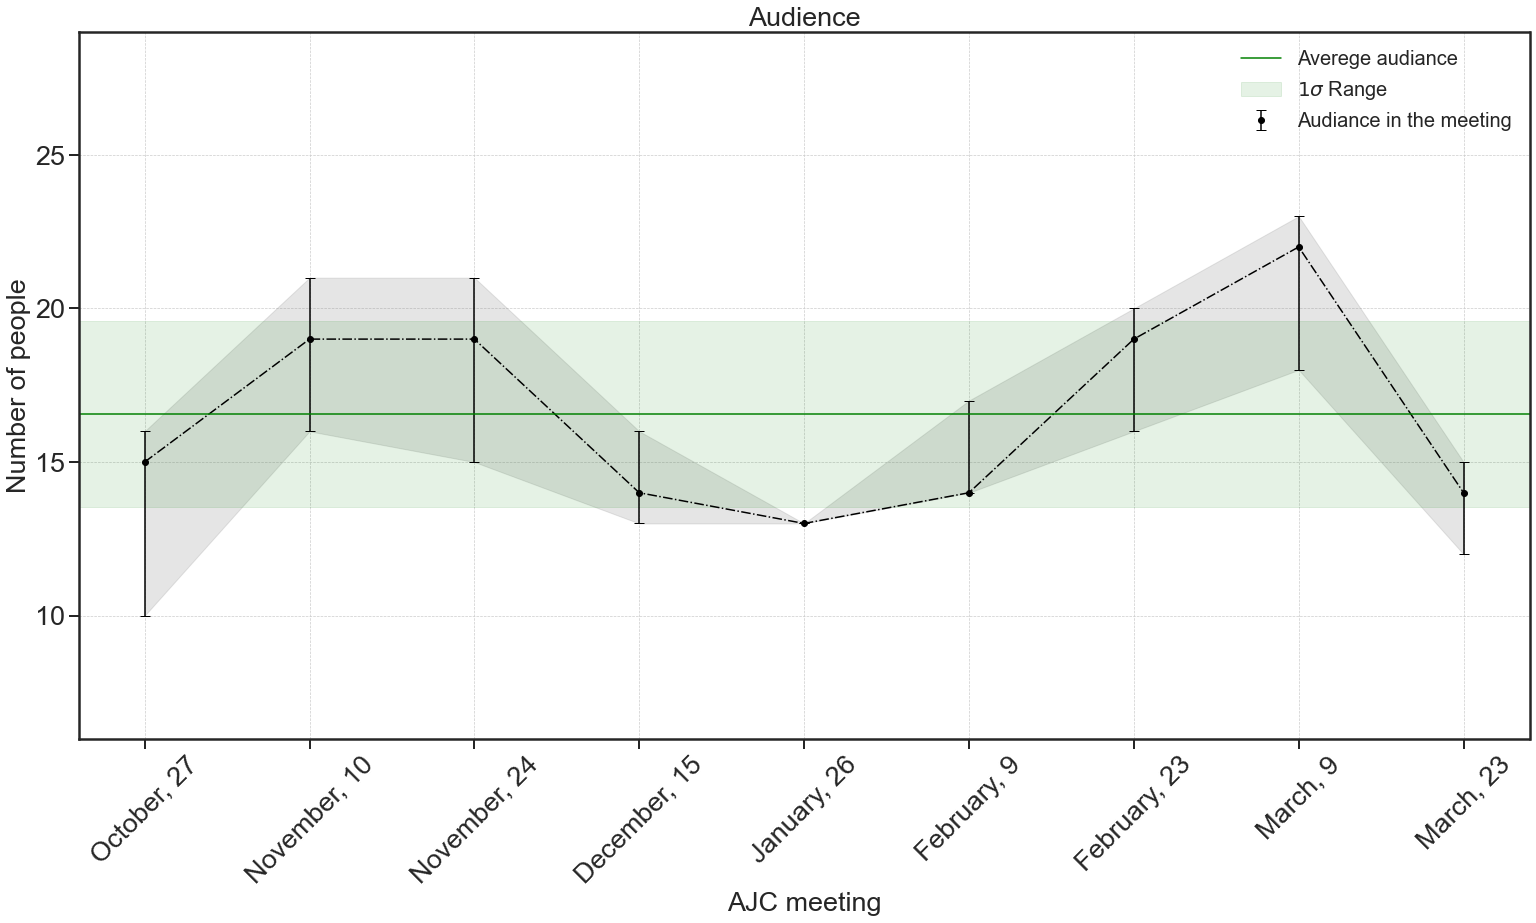

In [5]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [26, 13]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.xticks(rotation=45)

ax1 = plt.subplot(111)

ax1.set_title('Audience')
ax1.set_xlabel(r'AJC meeting',fontsize = 27)
ax1.set_ylabel(r'Number of people',fontsize = 27)

ax1.grid(linestyle='--',linewidth=0.7)
ax1.set_ylim(6,29)

asymmetric_error = [AJC_data[:,3]-AJC_data[:,1], AJC_data[:,2]-AJC_data[:,3]]

ax1.errorbar(AJC_data[:,0],AJC_data[:,3], yerr=asymmetric_error,alpha=1,color="k", marker='o', capsize=5, capthick=1,linestyle="none",label="Audiance in the meeting")

ax1.plot(AJC_data[:,0],AJC_data[:,3],color="k",linestyle="-.")

plt.fill_between(AJC_data[:,0],AJC_data[:,1],AJC_data[:,2],color="gray",alpha=0.2)

plt.axhline(Aud_mean,color='green',label="Averege audiance")
plt.axhspan(Aud_mean-Aud_std,Aud_mean+Aud_std,color="green",alpha=0.1,label="$1\sigma$ Range")

#ax1.scatter(AJC_data[:,0],AJC_data[:,3],s=80, alpha=1,color="k")

labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[1]='October, 27'
labels[2]='November, 10'
labels[3]='November, 24'
labels[4]='December, 15'
labels[5]='January, 26'
labels[6]='February, 9'
labels[7]='February, 23'
labels[8]='March, 9'
labels[9]='March, 23'
ax1.set_xticklabels(labels)

plt.legend(fontsize="20")

plt.show()

#plt.savefig("Plot/Audiance.pdf")

<ipython-input-6-6567f23ef785>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111)
<ipython-input-6-6567f23ef785>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


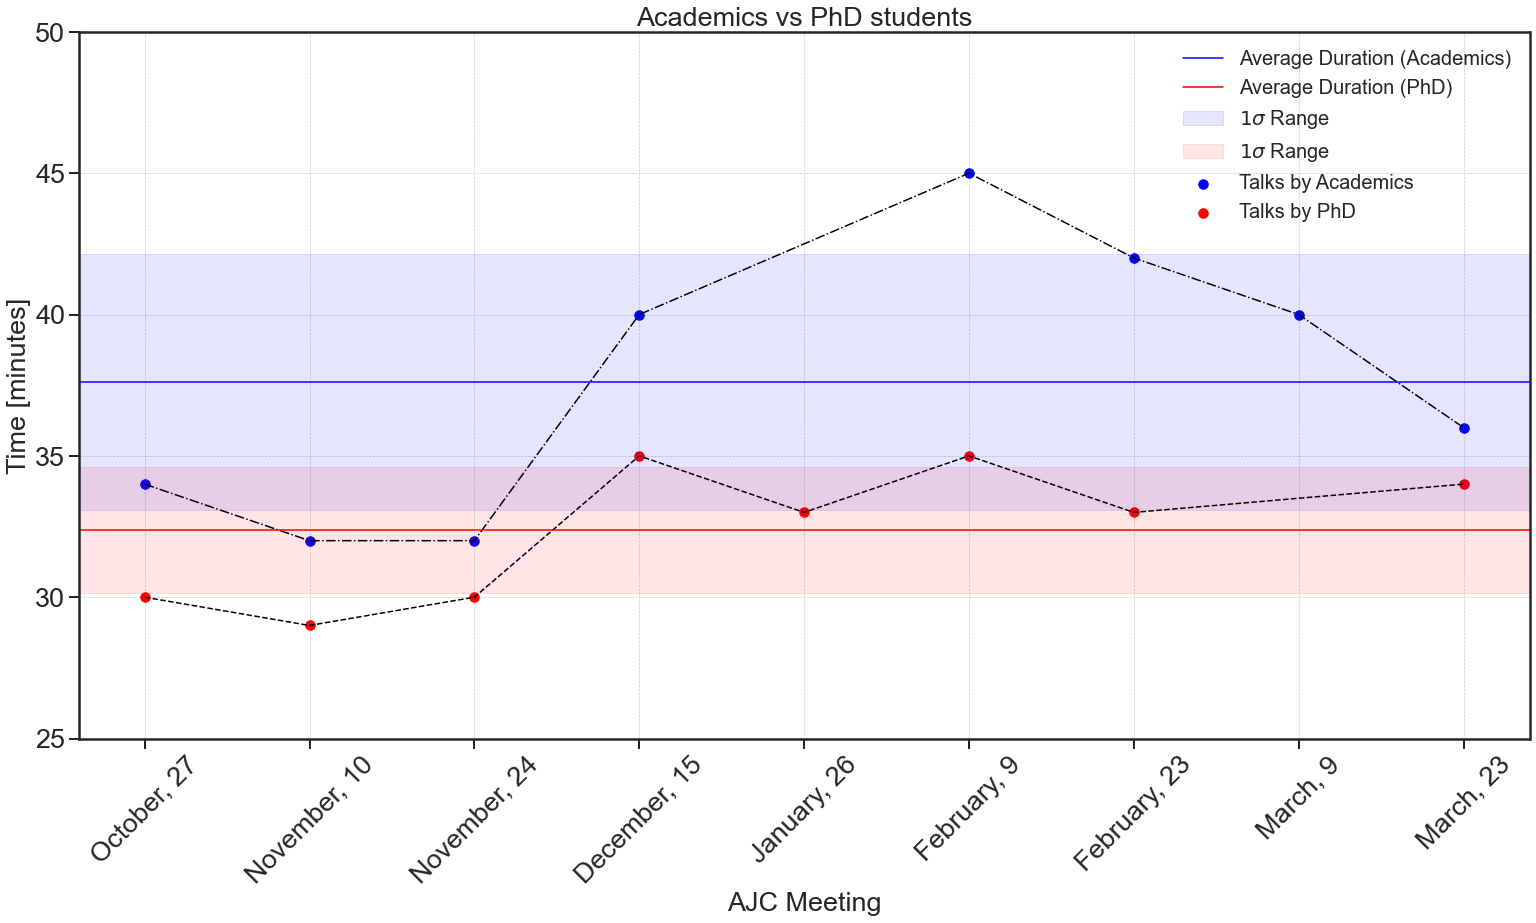

In [6]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [26,13]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.xticks(rotation=45)

ax1 = plt.subplot(111)

ax1.set_xlabel(r'AJC Meeting',fontsize = 27)
ax1.set_ylabel(r'Time [minutes]',fontsize = 27)
ax1.grid(linestyle='--',linewidth=0.7)

ax1.set_title('Academics vs PhD students')

ax1.set_ylim(25,50)

ax1.scatter(Acad_meetings,Acad_time,s=90, alpha=1,color="b",label="Talks by Academics")
ax1.plot(Acad_meetings,Acad_time,color="k",linestyle="-.")

ax1.scatter(PhD_meetings,PhD_time,s=90, alpha=1,color="r",label="Talks by PhD")
ax1.plot(PhD_meetings,PhD_time,color="k",linestyle="--")

plt.axhline(t_mean_Acad,color="b",label="Average Duration (Academics)")
plt.axhspan(t_mean_Acad-t_std_Acad,t_mean_Acad+t_std_Acad,color="blue",alpha=0.1,label="$1\sigma$ Range")

plt.axhline(t_mean_PhD,color="r",label="Average Duration (PhD)")
plt.axhspan(t_mean_PhD-t_std_PhD,t_mean_PhD+t_std_PhD,color="r",alpha=0.1,label="$1\sigma$ Range")

labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[1]='October, 27'
labels[2]='November, 10'
labels[3]='November, 24'
labels[4]='December, 15'
labels[5]='January, 26'
labels[6]='February, 9'
labels[7]='February, 23'
labels[8]='March, 9'
labels[9]='March, 23'
ax1.set_xticklabels(labels)

plt.legend(fontsize="20")

plt.show()

#plt.savefig("Plot/Academics_vs_png.pdf")

<ipython-input-7-e66c1a46b6da>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111)
<ipython-input-7-e66c1a46b6da>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


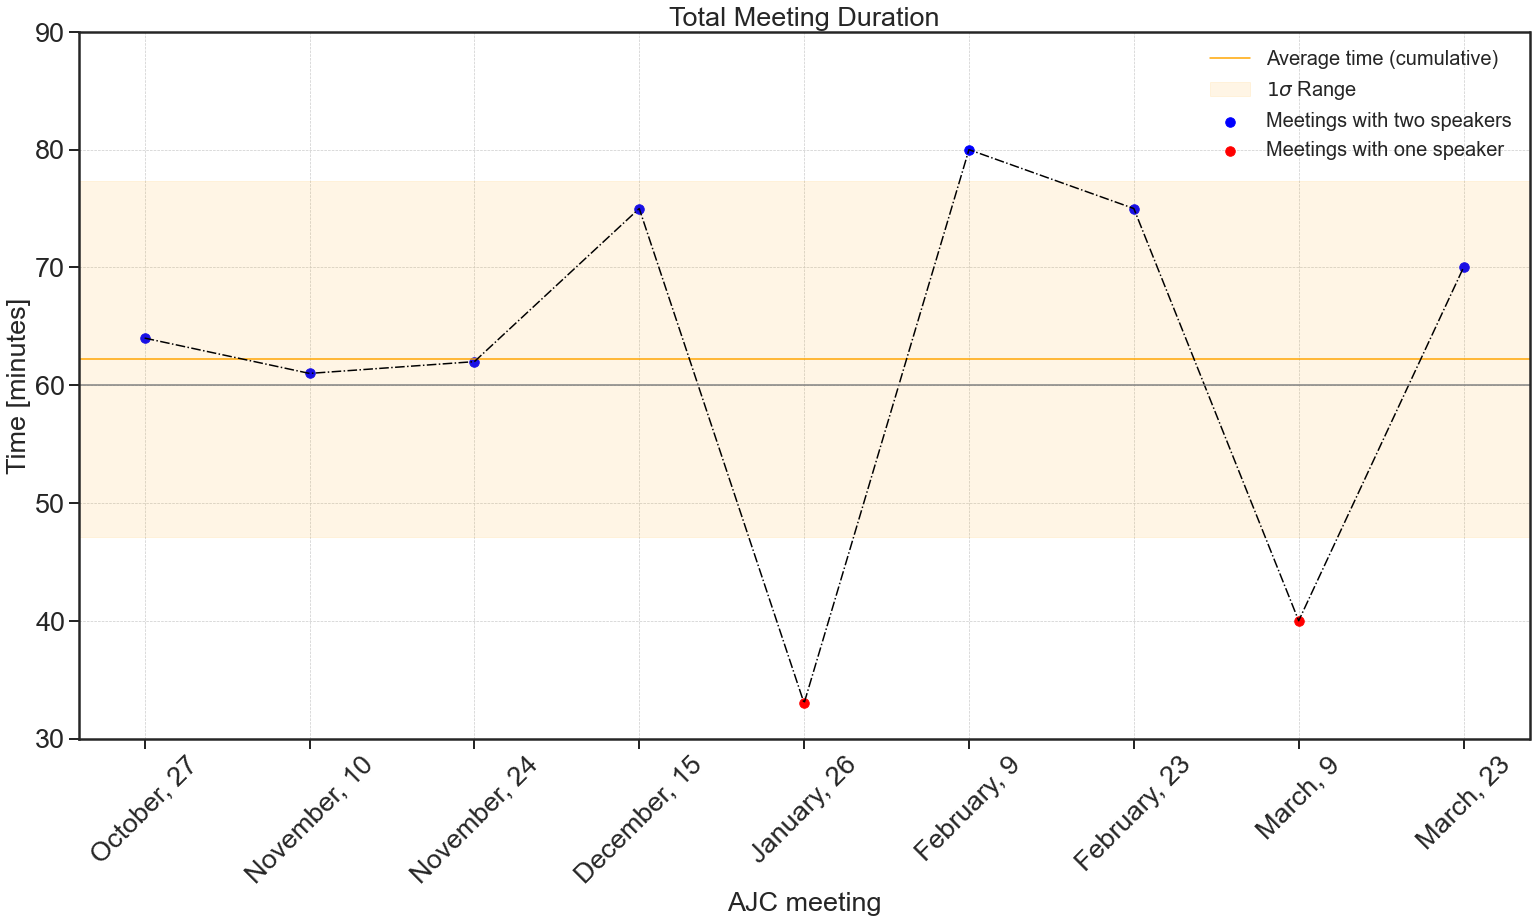

In [7]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [26, 13]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.xticks(rotation=45)

ax1 = plt.subplot(111)

ax1.set_xlabel(r'AJC meeting',fontsize = 27)
ax1.set_ylabel(r'Time [minutes]',fontsize = 27)
ax1.set_title('Total Meeting Duration')
ax1.grid(linestyle='--',linewidth=0.7)

ax1.set_ylim(30,90)

plt.axhline(t_mean_total,color="orange",label="Average time (cumulative)")
plt.axhspan(t_mean_total-t_std_total,t_mean_total+t_std_total,color="orange",alpha=0.1,label="$1\sigma$ Range")



ax1.scatter(AJC_data[0,0],AJC_data[0,6],s=90, alpha=1,color="b",label="Meetings with two speakers")
ax1.scatter(AJC_data[1,0],AJC_data[1,6],s=90, alpha=1,color="b")
ax1.scatter(AJC_data[2,0],AJC_data[2,6],s=90, alpha=1,color="b")
ax1.scatter(AJC_data[3,0],AJC_data[3,6],s=90, alpha=1,color="b")
ax1.scatter(AJC_data[4,0],AJC_data[4,6],s=90, alpha=1,color="r",label="Meetings with one speaker")
ax1.scatter(AJC_data[5,0],AJC_data[5,6],s=90, alpha=1,color="b")
ax1.scatter(AJC_data[6,0],AJC_data[6,6],s=90, alpha=1,color="b")
ax1.scatter(AJC_data[7,0],AJC_data[7,6],s=90, alpha=1,color="r")
ax1.scatter(AJC_data[8,0],AJC_data[8,6],s=90, alpha=1,color="b")

ax1.plot(AJC_data[:,0],AJC_data[:,6],color="k",linestyle="-.")

plt.axhline(60,color="grey")

labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[1]='October, 27'
labels[2]='November, 10'
labels[3]='November, 24'
labels[4]='December, 15'
labels[5]='January, 26'
labels[6]='February, 9'
labels[7]='February, 23'
labels[8]='March, 9'
labels[9]='March, 23'
ax1.set_xticklabels(labels)

plt.legend(fontsize="20")

plt.show()

#plt.savefig("Plot/Duration.pdf")

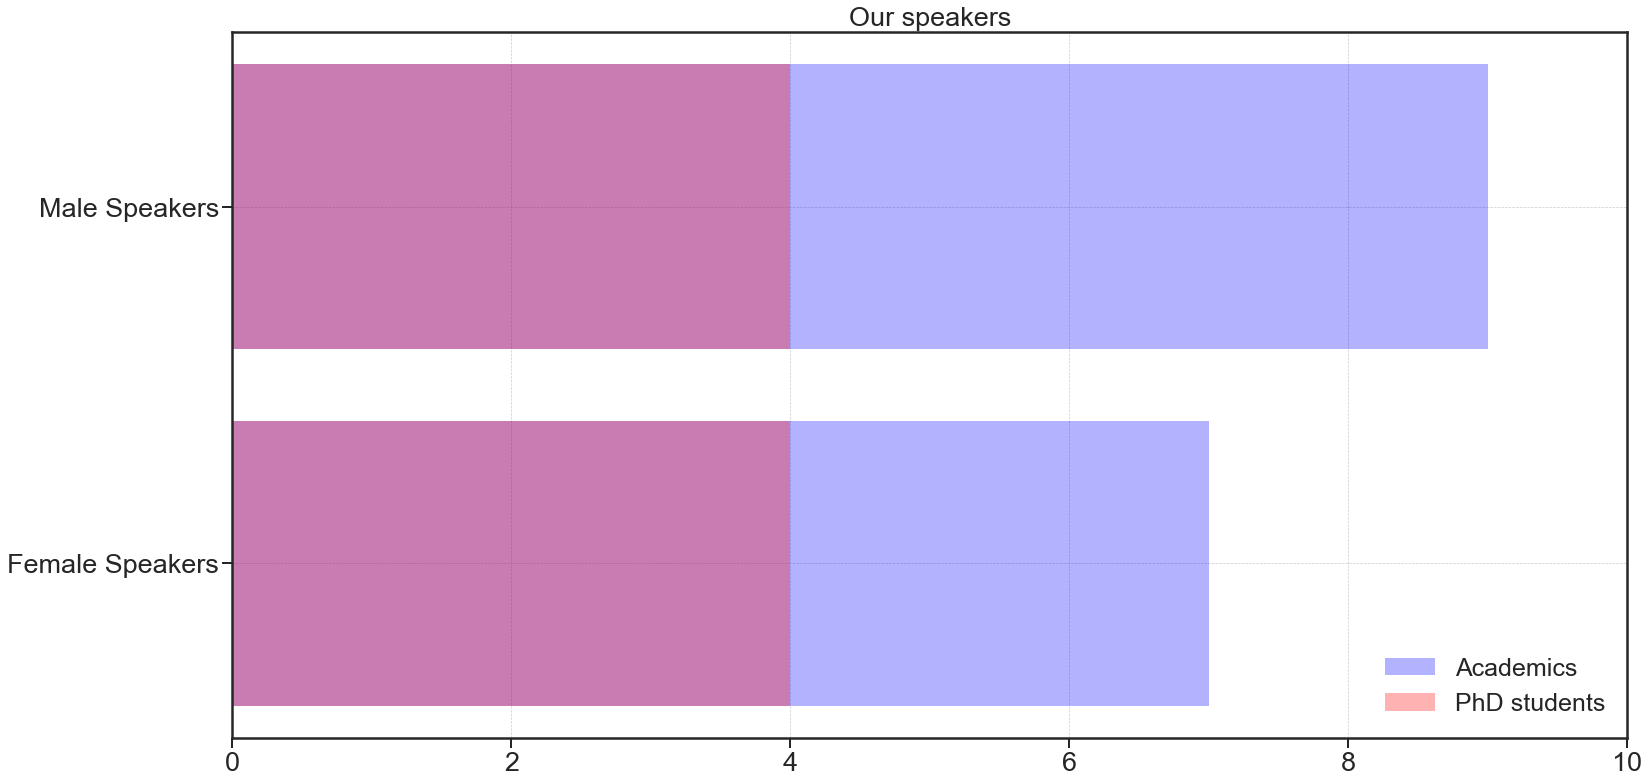

In [8]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [25, 13]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

ax1 = plt.subplot(111)
ax1.set_xlim(0,10)

ax1.set_title('Our speakers')
ax1.grid(linestyle='--',linewidth=0.7)

gender= ("Female Speakers" , "Male Speakers")


gender_speaker_total=[female_Acad+female_PhD, male_Acad+male_PhD]
gender_speaker_PhD=[female_PhD,male_PhD]

ax1.barh(gender, gender_speaker_total,label="Academics",color="blue",alpha=0.3)
ax1.barh(gender, gender_speaker_PhD,label="PhD students",color="red",alpha=0.3)
plt.legend(fontsize="25")
plt.show()
#plt.savefig("Plot/Gender.pdf")

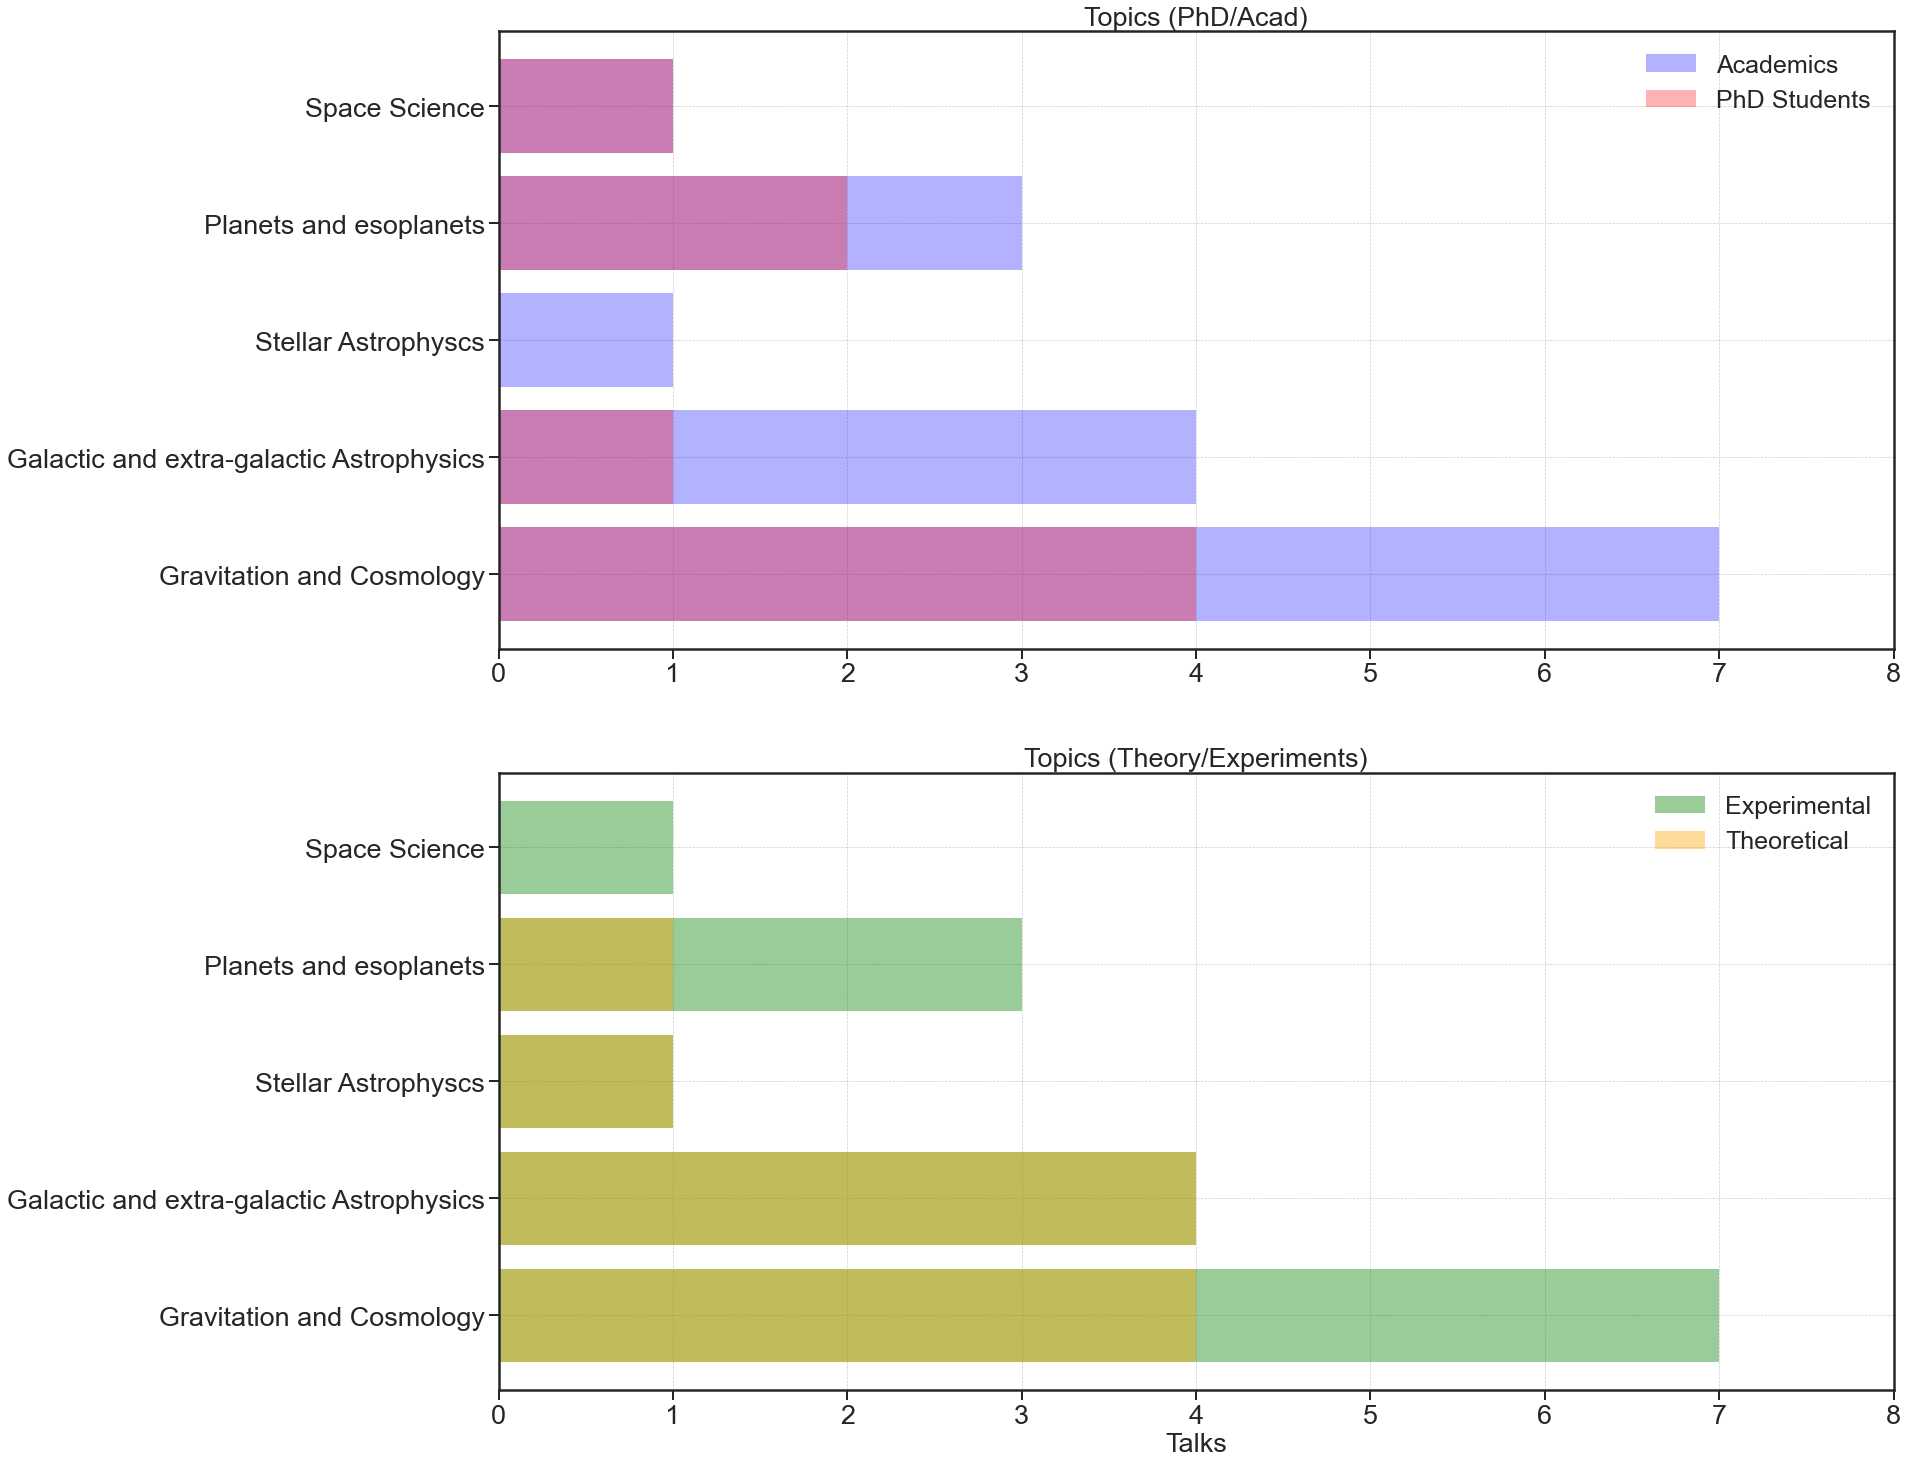

In [9]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
plt.rcParams["figure.figsize"] = [25, 25]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_xlim(0,8)

ax1.set_title('Topics (PhD/Acad)')
ax1.grid(linestyle='--',linewidth=0.7)

topics=("Gravitation and Cosmology", "Galactic and extra-galactic Astrophysics","Stellar Astrophyscs","Planets and esoplanets","Space Science")
Total_topic_talks=[Cosmology,Galactic,Stellar,Planets,SpaceS]
PhD_topic_talks=[Cosmology_PhD,Galactic_PhD,Stellar_PhD,Planets_PhD,SpaceS_PhD]

ax1.barh(topics,Total_topic_talks,label="Academics",color="blue",alpha=0.3)
ax1.barh(topics,PhD_topic_talks,label="PhD Students",color="red",alpha=0.3)

ax1.legend(fontsize="25")

ax2.set_xlim(0,8)

ax2.set_title('Topics (Theory/Experiments)')
ax2.grid(linestyle='--',linewidth=0.7)

topics=("Gravitation and Cosmology", "Galactic and extra-galactic Astrophysics","Stellar Astrophyscs","Planets and esoplanets","Space Science")
Total_topic_talks=[Cosmology,Galactic,Stellar,Planets,SpaceS]
Th_topic_talks=[Cosmology_th,Galactic_th,Stellar_th,Planets_th,0]

ax2.barh(topics,Total_topic_talks,label="Experimental",color="green",alpha=0.4)
ax2.barh(topics,Th_topic_talks,label="Theoretical",color="orange",alpha=0.4)

ax2.legend(fontsize="25")
ax2.set_xlabel(r'Talks',fontsize = 27)
plt.show()
